In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
import scipy.spatial

In [26]:
a = np.array([1,1,3,4,5,6,9,10,11,12])
b = np.array([1,6,0,5,0,10,6,1,6,10])

In [27]:
point = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
data

,a,b
Point,,
P1,1,1
P2,1,6
P3,3,0
P4,4,5
P5,5,0
P6,6,10
P7,9,6
P8,10,1
P9,11,6


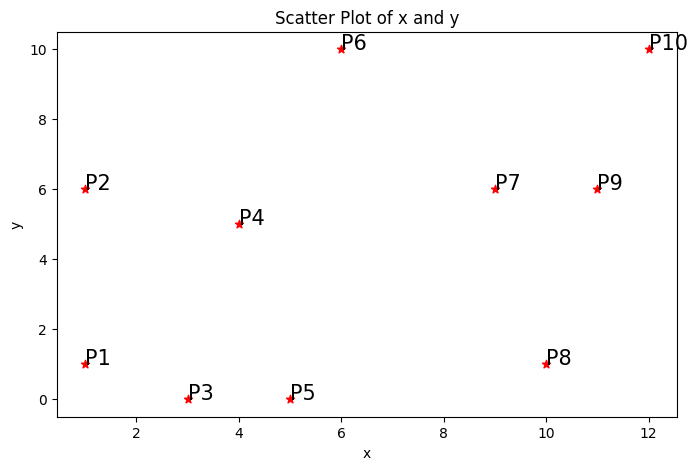

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(data['a'], data['b'], c='r', marker='*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

In [29]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(data[['a', 'b']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist=dist
dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
P1,0.000000,5.000000,2.236068,5.000000,4.123106,10.295630,9.433981,9.000000,11.180340,14.212670
P2,5.000000,0.000000,6.324555,3.162278,7.211103,6.403124,8.000000,10.295630,10.000000,11.704700
P3,2.236068,6.324555,0.000000,5.099020,2.000000,10.440307,8.485281,7.071068,10.000000,13.453624
P4,5.000000,3.162278,5.099020,0.000000,5.099020,5.385165,5.099020,7.211103,7.071068,9.433981
P5,4.123106,7.211103,2.000000,5.099020,0.000000,10.049876,7.211103,5.099020,8.485281,12.206556
P6,10.295630,6.403124,10.440307,5.385165,10.049876,0.000000,5.000000,9.848858,6.403124,6.000000
P7,9.433981,8.000000,8.485281,5.099020,7.211103,5.000000,0.000000,5.099020,2.000000,5.000000
P8,9.000000,10.295630,7.071068,7.211103,5.099020,9.848858,5.099020,0.000000,5.099020,9.219544
P9,11.180340,10.000000,10.000000,7.071068,8.485281,6.403124,2.000000,5.099020,0.000000,4.123106
P10,14.212670,11.704700,13.453624,9.433981,12.206556,6.000000,5.000000,9.219544,4.123106,0.000000


Text(0, 0.5, 'Distance')

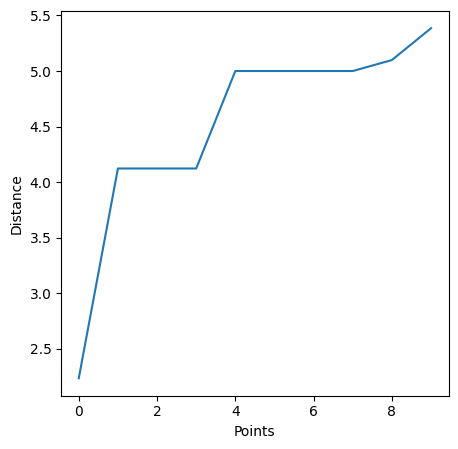

In [30]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(data)

distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,2], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

5.385164807134504


<Figure size 500x500 with 0 Axes>

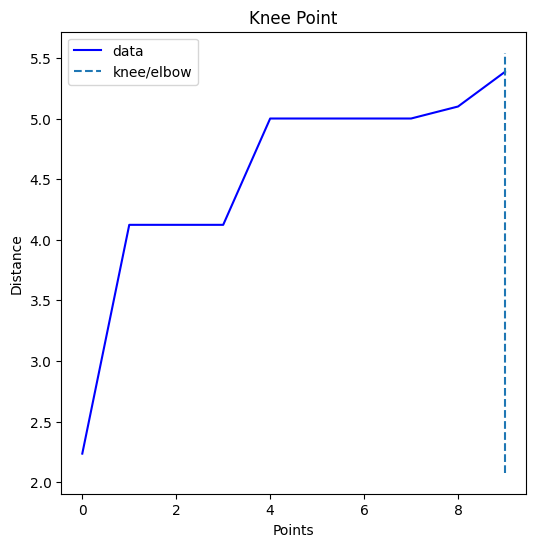

In [31]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 2
Estimated no. of noise points: 1
v_measure = 0.5812493673049759


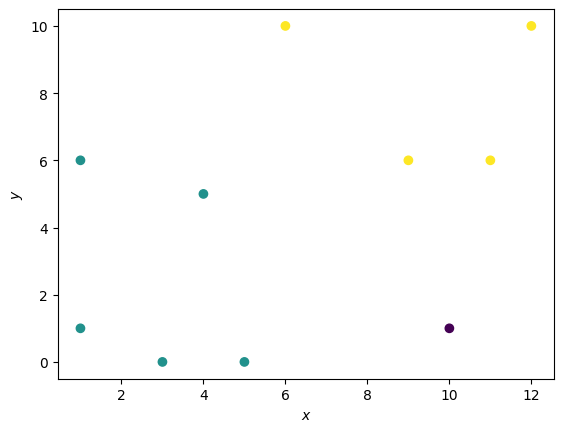

In [32]:
dbscan_cluster = DBSCAN(eps=5, min_samples=3)
dbscan_cluster.fit(data)

# Visualizing DBSCAN
plt.scatter(data['a'], 
data['b'], 
c=dbscan_cluster.labels_, 
label=data.index)
plt.xlabel("$x$")
plt.ylabel("$y$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(data.index, labels))